#   Business Problem


In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
df  = pd.read_csv('student_marks.csv')

In [5]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [6]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

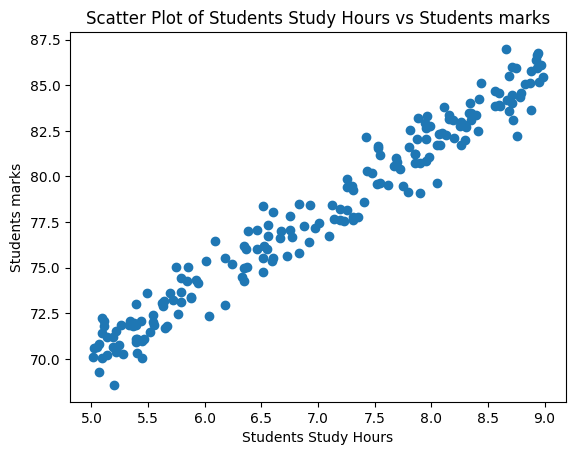

In [9]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [10]:
# Data Cleaning

In [11]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
df.study_hours.mean()

6.9959487179487185

In [13]:
df2 = df.fillna(df.study_hours.mean())

In [14]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [15]:
# split dataset

In [16]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks
#X=df[['area']]
#Y=df['price']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [18]:
X_train

,study_hours
164,7.870000
198,6.600000
140,8.600000
42,5.460000
127,7.140000
...,...
2,6.995949
51,7.310000
124,8.690000
107,5.720000


In [19]:
y_train

164    82.04
198    78.05
140    84.58
42     71.10
127    77.65
       ...  
2      78.68
51     77.77
124    83.57
107    73.25
147    74.34
Name: student_marks, Length: 160, dtype: float64

In [20]:
X_test

,study_hours
170,5.190000
78,5.090000
154,6.930000
86,5.880000
92,5.440000
188,6.995949
178,8.420000
130,5.640000
55,8.690000
82,6.660000


In [21]:
y_test

170    71.18
78     70.05
154    78.45
86     73.40
92     72.08
188    77.27
178    84.24
130    73.19
55     85.48
82     76.63
103    79.26
11     83.88
153    70.78
98     83.64
20     82.18
169    83.08
163    77.07
88     71.85
126    76.02
79     73.34
56     75.03
48     72.38
33     84.35
106    72.10
171    77.63
158    81.57
17     85.11
19     80.58
70     71.80
58     70.90
77     77.33
24     70.96
44     82.38
111    75.04
148    82.02
135    83.48
138    85.98
192    84.03
179    78.17
21     83.36
Name: student_marks, dtype: float64

# Select a model and train it

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
lr.coef_

array([3.88908782])

In [24]:
lr.intercept_

50.68307633250369

In [25]:
m = 3.93032419
c = 50.43877967508659
z  = m * 40 + c 
z

207.65174727508656

In [26]:
lr.predict([[40]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.24658915])

In [27]:
y_pred  = lr.predict(X_test)
y_pred

array([70.86744212, 70.47853334, 77.63445493, 73.55091272, 71.83971408,
       77.89093528, 83.42919578, 72.61753164, 84.47924949, 76.58440122,
       79.1123083 , 83.97366808, 71.06189651, 85.21817618, 79.54010796,
       83.15695963, 76.93441912, 71.41191442, 75.80658365, 73.55091272,
       73.0453313 , 72.22862286, 84.8292674 , 71.45080529, 78.64561776,
       79.96790762, 83.50697754, 80.51237992, 71.56747793, 71.64525969,
       76.19549244, 71.87860495, 82.1457968 , 75.45656575, 82.96250524,
       83.07917788, 84.55703125, 84.55703125, 78.91785391, 82.41803295])

In [28]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.190000,71.18,70.867442
1,5.090000,70.05,70.478533
2,6.930000,78.45,77.634455
3,5.880000,73.40,73.550913
4,5.440000,72.08,71.839714
5,6.995949,77.27,77.890935
6,8.420000,84.24,83.429196
7,5.640000,73.19,72.617532
8,8.690000,85.48,84.479249
9,6.660000,76.63,76.584401


## Fine-tune your model

In [29]:
lr.score(X_test,y_test)

0.9694386845461431

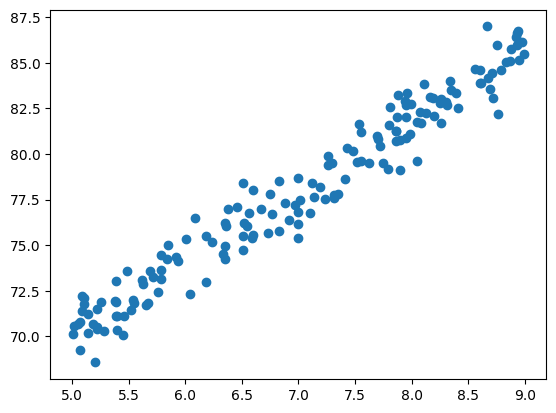

In [30]:
plt.scatter(X_train,y_train)  

In [31]:
lr.predict(X_train)

array([81.29019748, 76.35105595, 84.12923159, 71.91749583, 78.45116337,
       81.60132451, 75.41767487, 78.80118127, 85.1792853 , 84.55703125,
       84.71259476, 72.26751374, 70.5563151 , 73.08422218, 82.57359646,
       70.32296983, 79.96790762, 85.64597584, 72.73420427, 71.68415056,
       79.07341742, 76.03992892, 75.37878399, 83.15695963, 72.53974988,
       71.13967827, 82.53470558, 72.65642252, 80.04568938, 81.99023329,
       81.40687011, 76.00103804, 81.40687011, 78.37338161, 74.36762116,
       85.21817618, 81.2513066 , 77.89093528, 84.75148564, 81.99023329,
       72.1508411 , 71.64525969, 71.60636881, 79.92901674, 72.03416847,
       79.77345323, 76.00103804, 73.3953492 , 80.70683431, 79.57899884,
       79.50121708, 75.37878399, 84.40146774, 79.1123083 , 84.36257686,
       74.05649413, 71.87860495, 81.60132451, 77.44000054, 77.94558195,
       71.21746002, 80.97907045, 80.04568938, 71.68415056, 70.67298773,
       83.11806876, 76.6232921 , 72.22862286, 81.01796133, 83.00

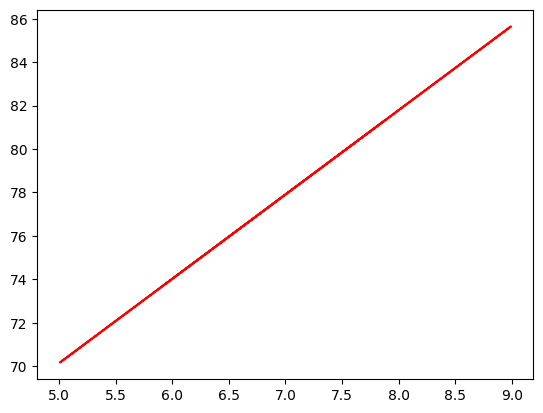

In [32]:
plt.plot(X_train, lr.predict(X_train), 'r-')

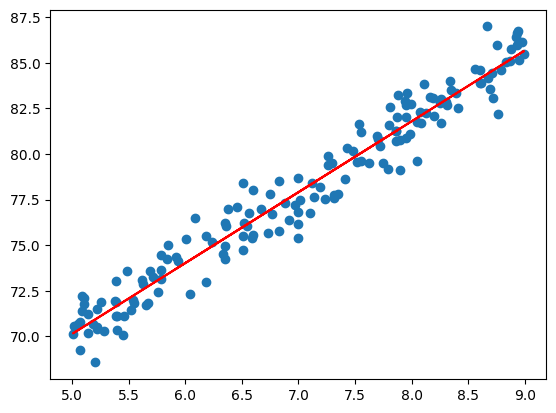

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

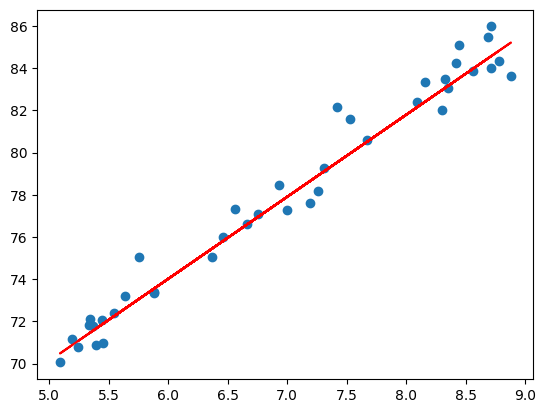

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

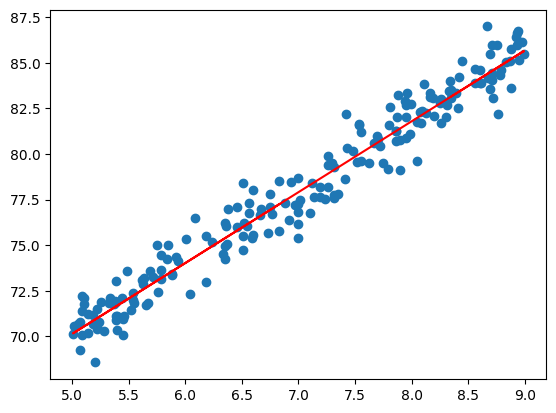

In [35]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")